In [85]:
# Import 3rd party libraries
import os
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [86]:
needle_locations = pd.read_csv('injection_site_locations.csv')
injection_locations = pd.read_csv('needle_dropbox_locations.csv')

In [87]:
print(needle_locations)
print(injection_locations)

                                       Location Name             Address
0                                        Fred Victor      139 Jarvis St.
1                                      Moss Park CTS  134 Sherbourne St.
2        Parkdale Queen West Community Health Centre    168 Bathurst St.
3        Parkdale Queen West Community Health Centre   1229 Queen St. W.
4  Regent Park Bevel Up CTS Site, Regent Park Com...   465 Dundas St. E.
5  South Riverdale Community Health Centre \nKeepSIX    955 Queen St. E.
6                                      Street Health   338 Dundas St. E.
7      Kensington Market Overdose Prevention Service         260 Augusta
8                    Toronto Public Health The Works    277 Victoria St.
9                                        Casey House    119 Isabella St.
                                      Location Name                    Address
0                                         The Works           277 Victoria St.
1                                      

In [41]:
!pip install geopy

In [42]:
!pip install folium

In [43]:
from geopandas.tools import geocode
import folium
from folium import Marker

from geopy.geocoders import Nominatim

In [84]:
# importing geopy library and Nominatim class
from geopy.geocoders import Nominatim

# calling the Nominatim tool and create Nominatim class
loc = Nominatim(user_agent="Geopy Library")

# entering the location name
getLoc = loc.geocode("1229 Queen St. W.")

# printing address
print(getLoc.address)

# printing latitude and longitude
# print("Latitude = ", getLoc.latitude, "\n")
# print("Longitude = ", getLoc.longitude)

Parkdale Queen West Community Health Centre, 1229, Queen Street West, Little Tibet, Parkdale—High Park, Old Toronto, Toronto, Golden Horseshoe, Ontario, M6K 0B9, Canada


In [88]:
needle_locations['Address'] = needle_locations['Address'] + " Toronto"
injection_locations['Address'] = injection_locations['Address'] + " Toronto"

In [94]:
# importing geopy library and Nominatim class
from geopy.geocoders import Nominatim

# calling the Nominatim tool and create Nominatim class
loc = Nominatim(user_agent="Geopy Library")

def address_to_lat(address):
    # Increase timeout due to slow running
    getLoc = loc.geocode(address, timeout=10)

    return getLoc.latitude

def address_to_lon(address):

    getLoc = loc.geocode(address, timeout=10)

    return getLoc.longitude

needle_locations['Latitude']=needle_locations['Address'].apply(lambda x: address_to_lat(x))
needle_locations['Longitude']=needle_locations['Address'].apply(lambda x: address_to_lon(x))

injection_locations['Latitude']=injection_locations['Address'].apply(lambda x: address_to_lat(x))
injection_locations['Longitude']=injection_locations['Address'].apply(lambda x: address_to_lon(x))


In [90]:
needle_locations.head()

,Location Name,Address,Latitude,Longitude
0,Fred Victor,139 Jarvis St. Toronto,43.653638,-79.373080
1,Moss Park CTS,134 Sherbourne St. Toronto,43.650110,-79.367883
2,Parkdale Queen West Community Health Centre,168 Bathurst St. Toronto,43.646596,-79.404186
3,Parkdale Queen West Community Health Centre,1229 Queen St. W. Toronto,43.641821,-79.429519
4,"Regent Park Bevel Up CTS Site, Regent Park Com...",465 Dundas St. E. Toronto,43.659435,-79.365355


In [95]:
injection_locations.head()

,Location Name,Address,Latitude,Longitude
0,The Works,277 Victoria St. Toronto,43.656532,-79.379324
1,Casey House,119 Isabella St. Toronto,43.667948,-79.383837
2,Dixon Hall,2714 Danforth Ave. Toronto,43.689113,-79.298146
3,Eva's Satelite,25 Canterbury Place Toronto,43.772806,-79.414749
4,Fred Victor,145 Queen St. E. Toronto,43.653523,-79.372693


In [ ]:
# Create a map of Toronto
from folium import Icon
from folium import CircleMarker
map = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=11)
injection_site_coord = list(zip(injection_locations['Latitude'], injection_locations['Longitude']))
needle_drop_coord = list(zip(needle_locations['Latitude'], needle_locations['Longitude']))

# Add points to the map
for lat, lon in injection_site_coord:
    CircleMarker([lat, lon], radius=4, color='red', fill=True, fill_color='red', fill_opacity=1).add_to(map)
for lat, lon in needle_drop_coord:
    CircleMarker([lat, lon], radius=4, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map)

map

In [133]:
neighbourhoods = gpd.read_file('toronto_neighbourhoods.shp')
neighbourhoods.head()

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry
0,2101,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,2102,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,2103,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
3,2104,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
4,2105,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."


In [139]:
needle_locations['coordinates'] = needle_drop_coord
needle_locations.head()

,Location Name,Address,Latitude,Longitude,coordinates
0,Fred Victor,139 Jarvis St. Toronto,43.653638,-79.373080,"(43.653638, -79.37308)"
1,Moss Park CTS,134 Sherbourne St. Toronto,43.650110,-79.367883,"(43.65011, -79.36788324999999)"
2,Parkdale Queen West Community Health Centre,168 Bathurst St. Toronto,43.646596,-79.404186,"(43.6465958, -79.40418579391564)"
3,Parkdale Queen West Community Health Centre,1229 Queen St. W. Toronto,43.641821,-79.429519,"(43.641820949999996, -79.42951898424849)"
4,"Regent Park Bevel Up CTS Site, Regent Park Com...",465 Dundas St. E. Toronto,43.659435,-79.365355,"(43.6594352, -79.3653549)"


In [134]:

# Extract the two columns from neighbourhoods
neighbourhoods = neighbourhoods[['FIELD_8', 'geometry']]

# Rename the column
neighbourhoods = neighbourhoods.rename(columns={'FIELD_8':'neighbourhood_name'})

# Split the entries in "name" and set the new entry to only the first index
neighbourhoods['neighbourhood_name'] = neighbourhoods['neighbourhood_name'].apply(lambda word: word.split("(")[0])

# View GeoDataFrame
neighbourhoods.head()

,neighbourhood_name,geometry
0,Wychwood,"POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,Yonge-Eglinton,"POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,Yonge-St.Clair,"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
3,York University Heights,"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
4,Yorkdale-Glen Park,"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."


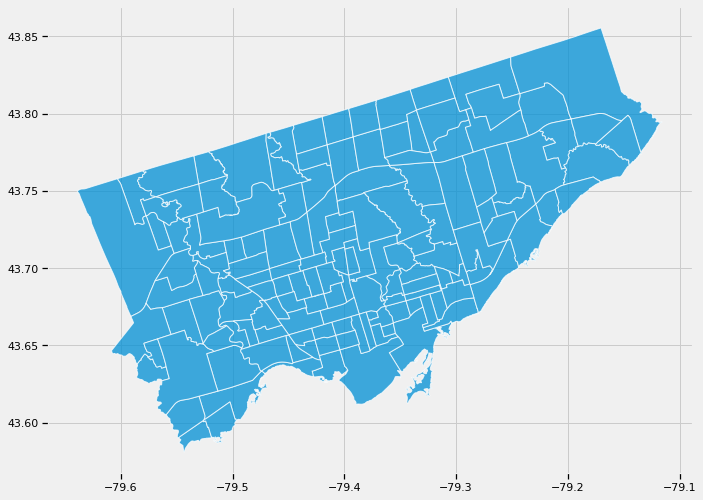

In [135]:
neighbourhoods.plot(figsize=(15, 8), edgecolor='w', alpha=0.75);

TypeError: no numeric data to plot

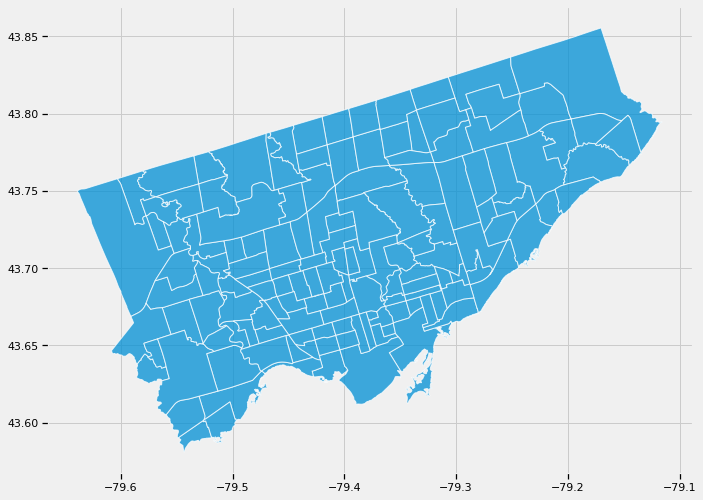

In [140]:
# Plot all three sets of data
ax= neighbourhoods.plot(figsize=(15, 8), edgecolor='w', alpha=0.75)
needle_locations['coordinates'].plot(ax=ax, color='orange', edgecolor='k', label='Bike Stations')
# needle_drop_coord.plot(ax=ax, color='red', alpha=0.6, edgecolor='k', label='Bike Lanes')

# Add a legend
plt.legend(fontsize = 14, loc=1)

# Set the axis labels
plt.xlabel('East, meters', fontsize=18)
plt.ylabel('North, meters', fontsize=18)

plt.show()

In [ ]:
injection_locations['Coordinates'] = injection_site_coord